### Лаборатоная работа №3. Вячеслав Денисов. Вариант 3.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from numpy import sqrt

#### Дано:

In [2]:
C = 1
L = 2
E = 200
P = 6000
b = 0.1
h = 0.1

#### Точное решение:

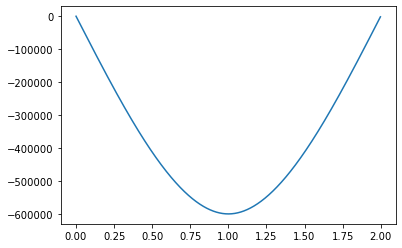

In [3]:
def uex(x):
    L = 2
    E = 200
    P = 6000
    b = 0.1
    h = 0.1
    p1 = 6 * P / (E * b * h * h * h)
    c2 = - p1 * L * L * 3 / 8
    c1 = c2 + (p1 * L * L / 4)
    c22 = - (p1 * L * L * L / 3) - (c2 * L)
    if ((0 <= x) & (x < L * 0.5)):
        a = (p1 * x * x * x / 6) + c1 * x
        return a
    #elif (((L * 0.5) <= x) & (x <= L)):
    else:
        a = p1 * ((L * x * x * 0.5) - (x * x * x / 6)) + (c2 * x) + c22
        return a
#График:
Q = 1000
X = [i * 0.001 * L for i in range(Q)]
# График точного решения
y_1 = [uex(x) for x in X]
plt.plot(X, y_1, label='y')

#### функция f

In [4]:
def f(x):
    L = 2
    E = 200
    P = 6000
    b = 0.1
    h = 0.1
    p1 = 6 * P / (E * b * h * h * h)
    if ((0 <= x) & (x < L * 0.5)):
        a = p1 * x
        return a
    elif (((L * 0.5) <= x) & (x <= L)):
        a = p1 * (L - x)
        return a

#### функция формы

In [5]:
def fi(x, i, N):
    delta = L / N
    if (i == 0):
        if ((0 <= x) & (x <= delta)):
            a = 1 - (x / delta)
            return a
        else:
            return 0
    elif (i == N):
        if ((((N - 1) * delta) <= x) & (x <= L)):
            a = (x / delta) - N + 1
            return a
        else:
            return 0
    else:
        if (((i - 1) * delta <= x) & (x <= i * delta)):
            a = (x / delta) - i + 1
            return a
        elif ((i * delta <= x) & (x <= (i + 1) * delta)):
            a = i + 1 - (x / delta)
            return a
        else:
            return 0

#### локальлная матрица для левой части

In [6]:
def Ke(N, i):
    c = np.zeros((N + 1, N + 1))
    c[i][i] = 1
    c[i][i+1] = -1
    c[i+1][i] = -1
    c[i+1][i+1] = 1
    return c

#### матрица жесткости

In [7]:
def K(N):
    #коэффициент
    ck = N / L
    #матрица
    c = np.zeros((N + 1, N + 1))
    #складываем локальные матрицы
    for i in range(N):
        g = Ke(N, i)
        c = c + g
    #зануляем первую и последнюю строки, ставим 1
    for i in range(N + 1):
        c[0][i] = 0
        c[N][i] = 0
    c[0][0] = 1
    c[N][N] = 1
    #домножаем на коэффициент
    c = ck * c
    return c

#### локальная матрица правой части

In [8]:
def Pe(N, i):
    c = np.zeros((N + 1, N + 1))
    c[i][i] = 2
    c[i][i+1] = 1
    c[i+1][i] = 1
    c[i+1][i+1] = 2
    return c

#### вектор нагрузок

In [9]:
def P(N):
    L = 2
    #коэффициент
    cp = - L / (6 * N)
    #матрица
    c1 = np.zeros((N + 1, N + 1))
    #складываем локальные матрицы
    for i in range(N):
        g = Pe(N, i)
        c1 = c1 + g
    #зануляем первую и последние строки
    for i in range(N + 1):
        c1[0][i] = 0
        c1[N][i] = 0
    #домножаем на коэффициент
    c1 = cp * c1
    #домножаем на вектор
    c2 = np.full(N + 1, 0) #пока заполним нулями, позже заполним f(x)
    for i in range(N + 1):
        x = i * L / N
        c2[i] = f(x)
    c3 = np.transpose(c2)
    c = c1.dot(c3)
    return c

#### решение слау

In [10]:
def mke(N):
    u = np.zeros(N + 1)
    Q, R = np.linalg.qr(K(N))
    u = np.linalg.solve(R, np.dot(Q.transpose(), P(N)))
    return u

#### приближенное решение

In [11]:
def uh(x, N):
    u = mke(N)
    s = 0
    for i in range(N + 1):
        k = fi(x, i, N)
        a = k * u[i]
        s = s + a
    return s

#### относительная погрешность на бесконечной норме

In [12]:
def e_inf(N):
    Q = 1000
    X = [i * 0.001 * L for i in range(Q)]
    a1 = max([np.abs(uex(x) - uh(x, N)) for x in X])
    a2 = max([np.abs(uex(x)) for x in X])
    a = a1 / a2
    return a

def u1(x, N):
    return ((uex(x) - uh(x, N)) ** 2)

def u2(x):
    return (uex(x) ** 2)

#### относительная погрешность на L2

In [13]:
def e_l2(N):
    Q = 1000
    X = [i * 0.001 * L for i in range(Q)]
    a1 = sum(u1(x, N) * 0.001 * L for x in X)
    a2 = sum(u2(x) * 0.001 * L for x in X)
    a = sqrt (a1 / a2)
    return a

#### число обусловленности

In [14]:
def mu(A):
    return np.linalg.cond(A)

#### Итоговое решение

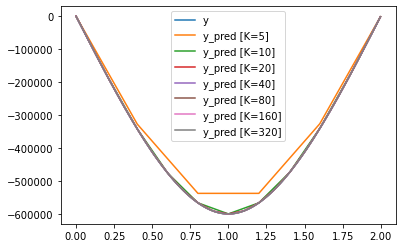

N	Er_inf	Порядок_сходимости	Er_L2	mu(K)

5	0.10400075555555557	0.8878899998765459	0.08119454060097275	10.99460031976541

10	0.01350540188888941	2.9449855326479537	0.009032302750258597	40.6897549838851

20	0.00356331847221377	1.922243236216808	0.002266783431963109	161.87377437504048

40	0.0009137233055340277	1.9633921719608391	0.0005677711681167894	648.0040189478865

80	0.0002319283845803389	1.9780779581053356	0.00014254972493377363	2593.2634378271205

160	5.895267532866756e-05	1.9760502044961954	3.621426224214592e-05	10374.676473872994

320	1.5116178445168764e-05	1.9634638308682064	9.631696169718356e-06	41500.51712589365



In [15]:
Q = 1000
X = [i * 0.001 * L for i in range(Q)]
# График точного решения
y_1 = [uex(x) for x in X]
plt.plot(X, y_1, label='y')
logs = [] # Таблица результатов
b1 = e_inf(2)
for N in [5, 10, 20, 40, 80, 160, 320]:
    y = [uh(x, N) for x in X]

    a1 = e_inf(N)
    a2 = e_l2(N)
    plt.plot(X, y, label=f'y_pred [K={str(N)}]')
    logs.append(f"{N}\t"
                f"{a1}\t"
                f"{np.log2(b1/a1)}\t"
                f"{a2}\t"
                f"{mu(K(N))}\n")
    b1 = a1
plt.legend()
plt.show()
for line in ['N\tEr_inf\tПорядок_сходимости\tEr_L2\tmu(K)\n'] + logs: 
    print(line)

In [ ]:
Q = 1000
X = [i * 0.001 * L for i in range(Q)]
# График точного решения
y_1 = [uex(x) for x in X]
plt.plot(X, y_1, label='y')
logs = [] # Таблица результатов
b1 = e_inf(2)
for N in [5, 10, 20, 40, 80, 160, 320, 640, 1280]:
    y = [uh(x, N) for x in X]

    a1 = e_inf(N)
    a2 = e_l2(N)
    plt.plot(X, y, label=f'y_pred [K={str(N)}]')
    logs.append(f"{N}\t"
                f"{a1}\t"
                f"{np.log2(b1/a1)}\t"
                f"{a2}\t"
                f"{mu(K(N))}\n")
    b1 = a1
plt.legend()
plt.show()
for line in ['N\tEr_inf\tПорядок_сходимости\tEr_L2\tmu(K)\n'] + logs: 
    print(line)